In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from templates import *
from templates_latent import *

In [3]:
device = 'cuda:3'
conf = ffhq256_autoenc_latent()
conf.T_eval = 100
conf.latent_T_eval = 100
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
print(model.load_state_dict(state['state_dict'], strict=False))
model.to(device);

Global seed set to 0


Model params: 212.29 M
loading pretrain ... 90M
step: 1563562
loading latent stats ...
<All keys matched successfully>


In [14]:
torch.manual_seed(4)
imgs = model.sample(8, device=device, T=20, T_latent=200)

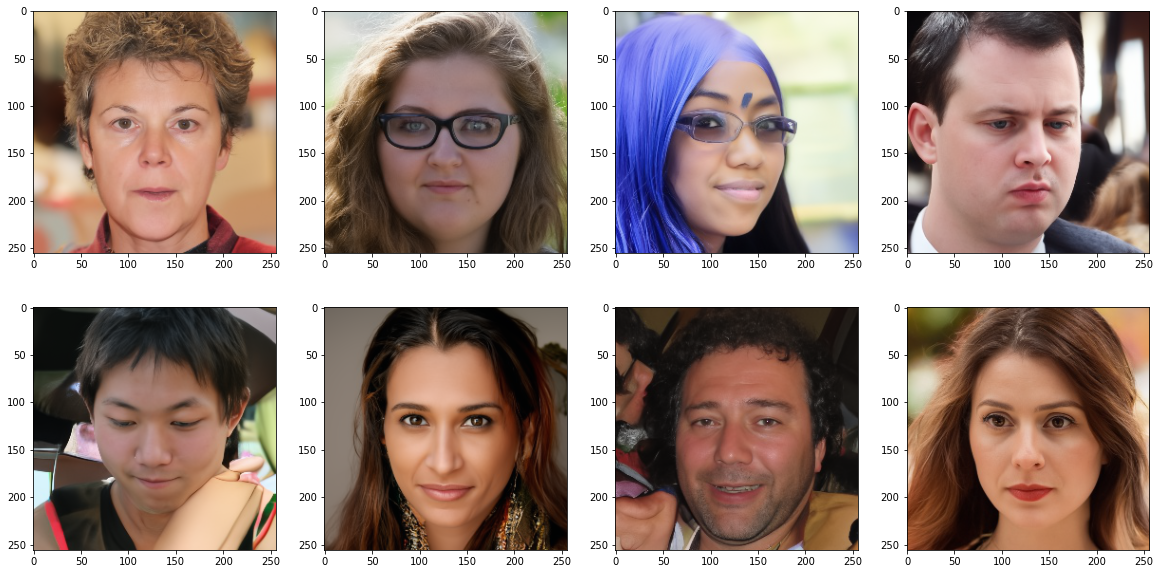

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(4*5, 2*5))
ax = ax.flatten()
for i in range(len(imgs)):
    ax[i].imshow(imgs[i].cpu().permute([1, 2, 0]))